In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
from joblib import dump
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
wcss_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    silhouette.append(silhouette_score(df, kmeans.labels_))
    wcss_scores.append(kmeans.inertia_)

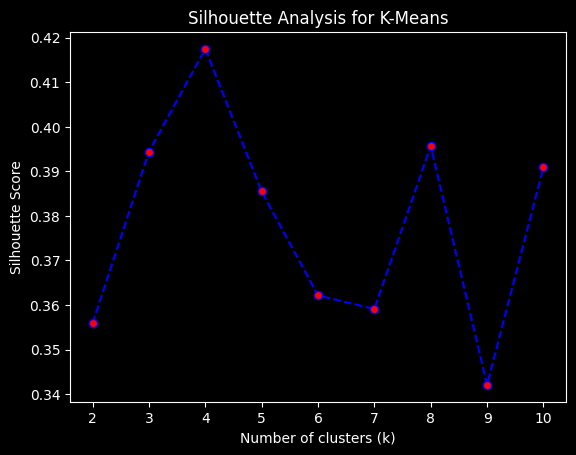

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for K-Means")
plt.savefig("Images/Silhouette_Analysis.png", bbox_inches="tight")

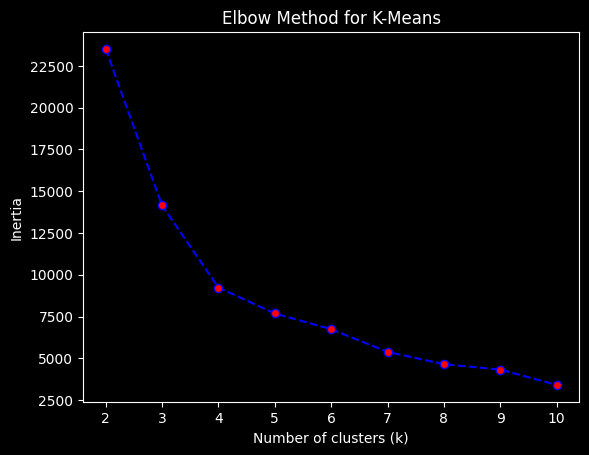

In [5]:
plt.plot(
    range(2, 11),
    wcss_scores,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.savefig("Images/Elbow_Method.png", bbox_inches="tight")

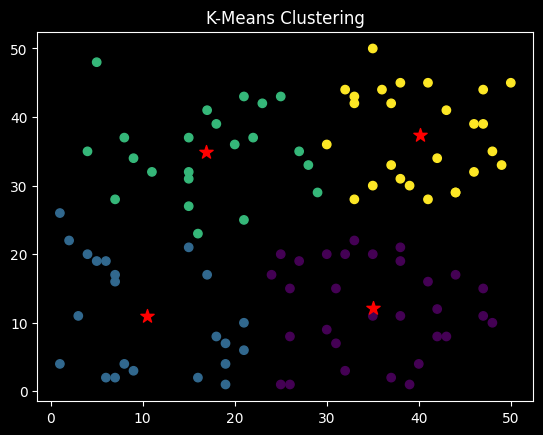

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
plt.scatter(df["X"], df["Y"], c=kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker=MarkerStyle("*"), c="red", s=100)
plt.title("K-Means Clustering")
plt.savefig("Images/K-Means.png", bbox_inches="tight")

In [7]:
centroids

array([[35.06666667, 12.1       ],
       [10.5       , 10.95454545],
       [16.86363636, 34.86363636],
       [40.15384615, 37.34615385]])

In [8]:
def distance(point1, point2):
    """Calculates the Euclidean distance between two points."""
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


def get_cluster_radius(df, centroid):
    x = df.apply(lambda row: distance(row[["X", "Y"]], centroid), axis=1).max()
    return x


cluster_radii = []
for cluster_id in range(4):
    radius = get_cluster_radius(df[kmeans.labels_ == cluster_id], centroids[cluster_id])
    cluster_radii.append(radius)

In [9]:
cluster_radii

[14.984918344047713, 17.793698392389903, 17.700562628215298, 13.66316042000247]

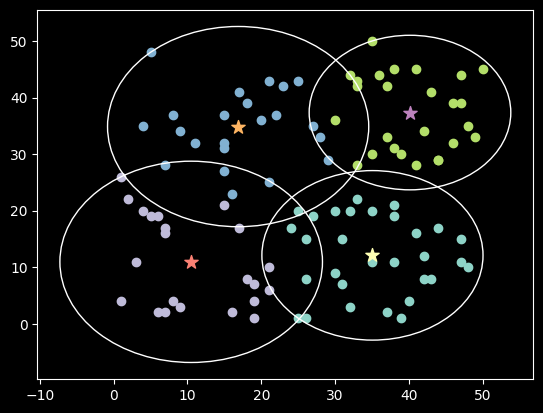

In [10]:
fig, ax = plt.subplots()
for i in range(4):
    data_subset = df[kmeans.labels_ == i]
    ax.scatter(data_subset["X"], data_subset["Y"])
    ax.scatter(centroids[i][0], centroids[i][1], marker=MarkerStyle("*"), s=100)

for i in range(4):
    circle = Circle(xy=centroids[i], radius=cluster_radii[i], fill=False)
    ax.add_patch(circle)
plt.savefig("Images/Clusters_with_Borders.png", bbox_inches="tight")

In [11]:
silhouette_score(df, kmeans.labels_)

0.4174859988046308

In [12]:
calinski_harabasz_score(df, kmeans.labels_)

103.55497808995095

In [13]:
kmeans.inertia_

9235.472261072262

In [14]:
dump(kmeans, "../../../Models/k-MeansCluster.joblib")

['../../../Models/k-MeansCluster.joblib']